In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

### **1. Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.**
    1. Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe?  
    2. Estimate the mean and the variance of the sum.

In [14]:
mu = -10
sigma = 5
sample1 = np.random.normal(mu, sigma, 1000)
sample2 = np.random.normal(mu, sigma, 1000)

df = pd.DataFrame()
df['sample 1'] = sample1
df['sample 2'] = sample2

(array([  6.,  19.,  61., 134., 165., 236., 194., 113.,  55.,  17.]),
 array([-42.0835019 , -38.05739757, -34.03129325, -30.00518892,
        -25.9790846 , -21.95298027, -17.92687595, -13.90077163,
         -9.8746673 ,  -5.84856298,  -1.82245865]),
 <a list of 10 Patch objects>)

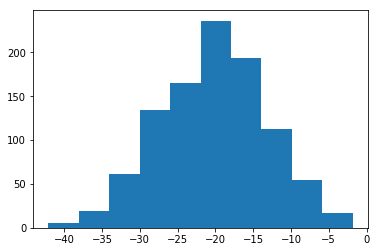

In [20]:
df['sum sample'] = df['sample 1'] + df['sample 2']
plt.hist(df['sum sample'])

In [24]:
df['sum sample'].mean()

-20.248903172901066

In [26]:
df['sum sample'].var()

49.72776674125641

In [18]:
df.head()

,sample 1,sample 2,sum sample
0,-17.697703,1.723508,-15.974195
1,-5.187628,-1.192281,-6.379909
2,-3.596492,-12.476086,-16.072578
3,-10.573071,-7.543890,-18.116960
4,-4.567748,-9.654309,-14.222057


### 2. Central Limit Theorem Let $X_i$ be an [iid](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) Bernoulli random variable with value {-1,1}. Look at the random variable $Z_n = \frac{1}{\sqrt{n}}\sum X_{i}$ By taking 1000 draws from $Z_n$, plot its histogram. Check that for small $n$ (say, 5-10) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (already by the time $n$ = 30 or 50) it looks much more like a Gaussian. Check also for much bigger $n$: $n$ = 250, to see that at this point, one can really see the bell curve

In [58]:
def getXi(): return np.random.choice((-1,0,1),1)[0]
def getSumXi(n): return sum(np.random.choice((-1,0,1),n))
def getZn(n): return (1/(sqrt(n)) * getSumXi(n))
def getZnDf(n):
    df = pd.DataFrame(columns=['Zn'])
    values = []
    for i in range(1,n):
        values.append(getZn(i))
    return df.append(pd.DataFrame({'Zn':values}))

(array([1., 0., 0., 0., 0., 1., 0., 0., 1., 1.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

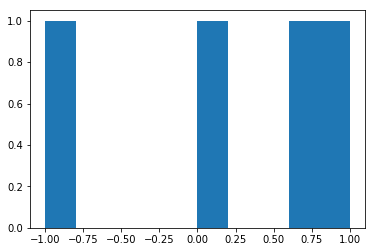

In [59]:
df = getZnDf(5)
plt.hist(df.Zn)

(array([ 1.,  1.,  3.,  4.,  2., 12.,  1.,  3.,  1.,  1.]),
 array([-1.66666667, -1.35566243, -1.0446582 , -0.73365396, -0.42264973,
        -0.1116455 ,  0.19935874,  0.51036297,  0.82136721,  1.13237144,
         1.44337567]),
 <a list of 10 Patch objects>)

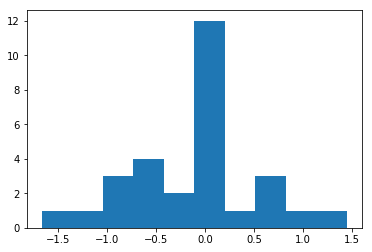

In [60]:
df = getZnDf(30)
plt.hist(df.Zn)

(array([2., 2., 3., 5., 6., 6., 7., 8., 6., 4.]),
 array([-1.60356745, -1.30987737, -1.01618729, -0.72249722, -0.42880714,
        -0.13511706,  0.15857302,  0.4522631 ,  0.74595318,  1.03964325,
         1.33333333]),
 <a list of 10 Patch objects>)

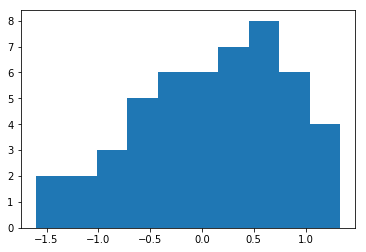

In [61]:
df = getZnDf(50)
plt.hist(df.Zn)

(array([ 4.,  6., 25., 51., 61., 44., 35., 20.,  0.,  3.]),
 array([-2.19970673, -1.7219347 , -1.24416267, -0.76639064, -0.28861862,
         0.18915341,  0.66692544,  1.14469746,  1.62246949,  2.10024152,
         2.57801355]),
 <a list of 10 Patch objects>)

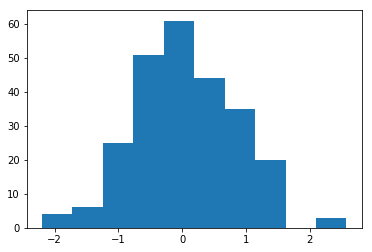

In [62]:
df = getZnDf(250)
plt.hist(df.Zn)